# Scikit-Learn

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

In [7]:
# Generate data
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 ..., 
 [-0.23142814 -1.60800704]
 [-0.60291835  6.87297279]
 [ 2.28425964  4.87408773]]
['r' 'r' 'b' 'r' 'b']


In [8]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [9]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print(X[:5])            # 5 first rows
print(X[500:510, 0])    # values from row 500 to row 510 at column 0
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]]
[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]
 [ 4.51558296 -2.88138033]]
[-4.43836309 -2.45974437  4.33104832 -7.92069399  1.56972029  0.56451501
  4.99608298  4.75811106 -1.60421418  1.10129122]
[[-5.18412293 -1.25347025]
 [ 4.51558296 -2.88138033]
 [ 1.70826922  2.62387342]
 [-0.52606562  8.95985097]
 [-1.07591403  9.78730967]]


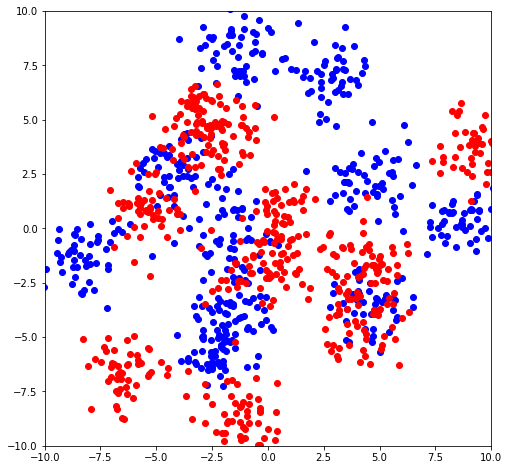

In [10]:
# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [11]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [12]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# Estimator state is stored in instance attributes
clf._tree

### Predictors

In [14]:
# Make predictions  
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [15]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[ 0.   1. ]
 [ 0.   1. ]
 [ 0.2  0.8]
 [ 0.6  0.4]
 [ 0.8  0.2]]


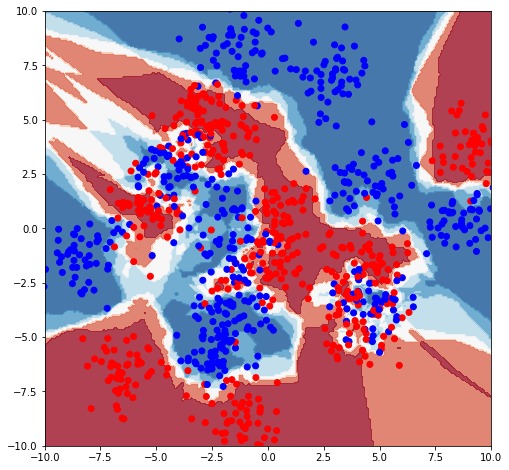

In [17]:
from tutorial import plot_surface    
plot_surface(clf, X, y)

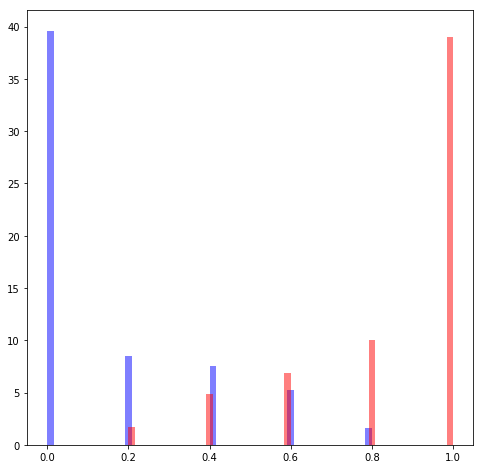

In [18]:
from tutorial import plot_histogram    
plot_histogram(clf, X, y)

## Classifier zoo

### Decision trees

Idea: greedily build a partition of the input space using cuts orthogonal to feature axes.

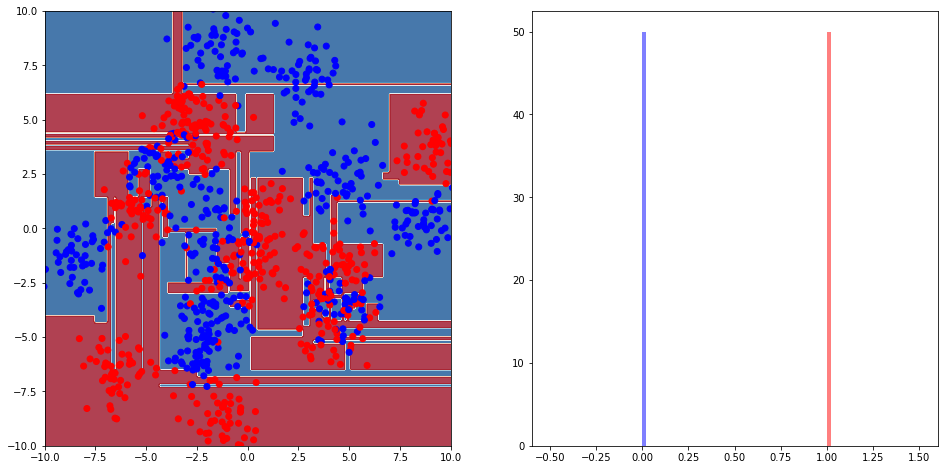

In [19]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

### Random Forests

Idea: Build several decision trees with controlled randomness and average their decisions.

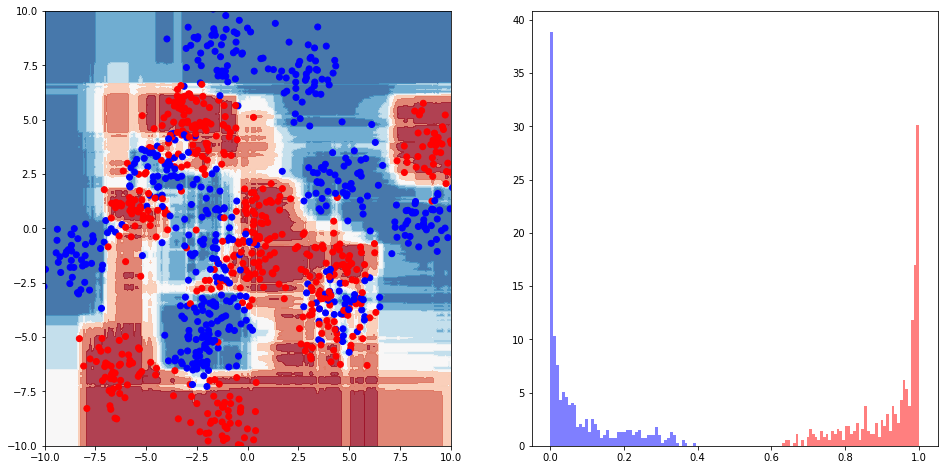

In [20]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

### Logistic regression

Idea: model the decision boundary as an hyperplane.

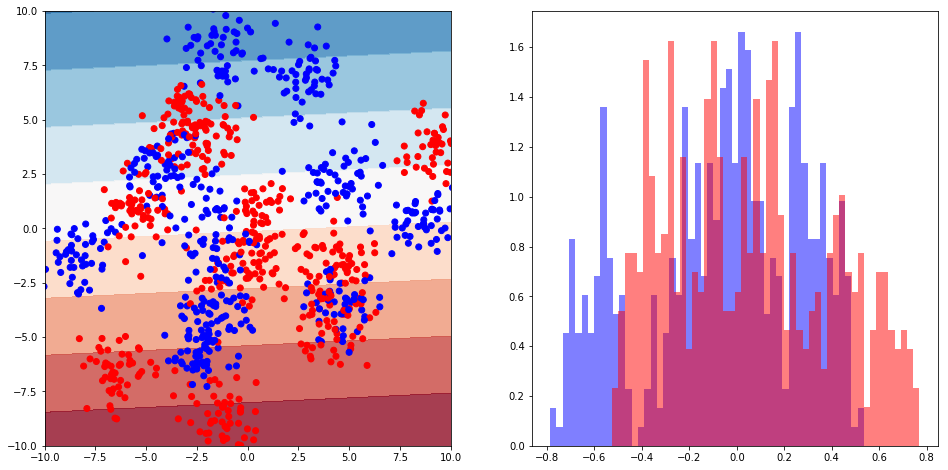

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
plot_clf(clf, X, y)

### Support vector machines

Idea: Find the hyperplane which has the largest distance to the nearest training points of any class.

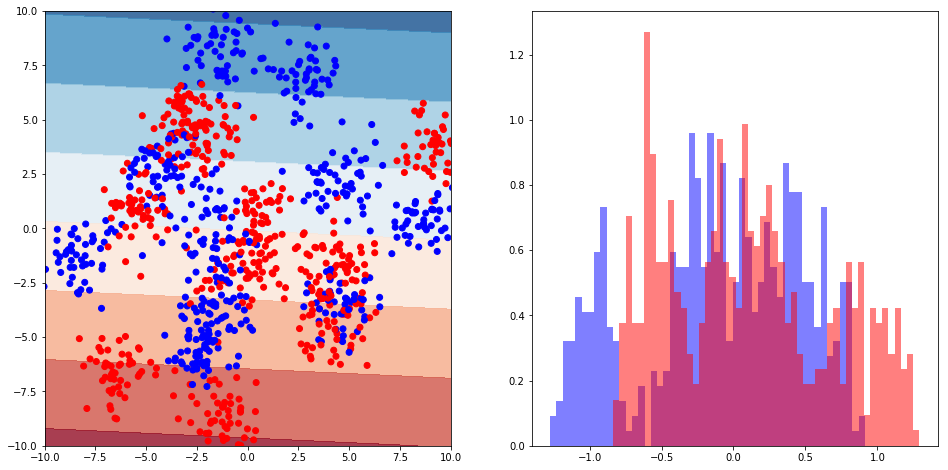

In [23]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")  # try kernel="rbf" instead
clf.fit(X, y)
plot_clf(clf, X, y)

### Multi-layer perceptron

Idea: a multi-layer perceptron is a circuit of non-linear combinations of the data.

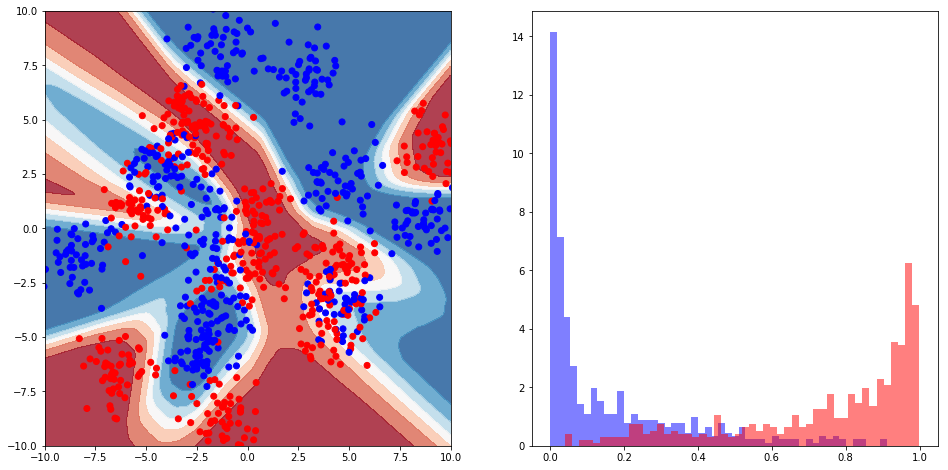

In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", learning_rate="invscaling")
clf.fit(X, y)
plot_clf(clf, X, y)

# Model evaluation and selection

## Training error

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

('Training error =', 0.0)


## Test error

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

('Training error =', 0.10133333333333339)
('Test error =', 0.19599999999999995)


Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

## Cross-validation

In [27]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


In [28]:
# Shortcut
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


## Metrics

### Accuracy

Definition: The accuracy is the proportion of correct predictions.

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

('Accuracy =', 0.83999999999999997)


### Precision, recall and F-measure

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

('Precision =', 0.81188118811881194)
('Recall =', 0.86315789473684212)
('F =', 0.83673469387755106)


### ROC AUC

Definition: Area under the curve of the false positive rate (FPR) against the true positive rate (TPR) as the decision threshold of the classifier is varied.

('ROC AUC =', 0.92977443609022559)


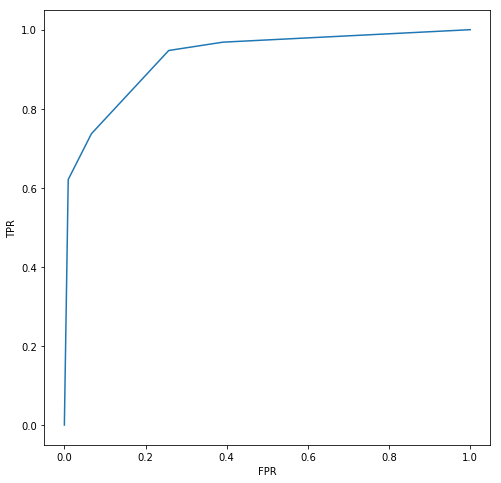

In [32]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer("roc_auc")
print("ROC AUC =", roc_auc_scorer(clf, X_test, y_test))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Confusion matrix

Definition: number of samples of class $i$ predicted as class $j$.

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[86, 19],
       [13, 82]])

## Model selection
 
- Finding good hyper-parameters is crucial to control under- and over-fitting, hence achieving better performance.
- The estimated generalization error can be used to select the best model.

## Under- and over-fitting

- Under-fitting: the model is too simple and does not capture the true relation between X and Y.
- Over-fitting: the model is too specific to the training set and does not generalize.

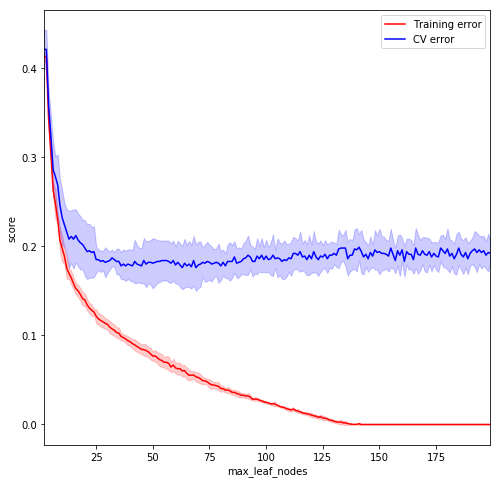

In [34]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(2, 200)
param_name = "max_leaf_nodes"

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")

In [35]:
# Best trade-off
print("%s = %d, CV error = %f" % (param_name,
                                  param_range[np.argmax(test_scores_mean)],
                                   1. - np.max(test_scores_mean)))

max_leaf_nodes = 63, CV error = 0.176000


## Hyper-parameter search

In [36]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=5, n_jobs=-1)
grid.fit(X, y)  # Note that GridSearchCV is itself an estimator

print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, 
                                                 grid.best_params_))

Best score = 0.131000, Best parameters = {'n_neighbors': 34}


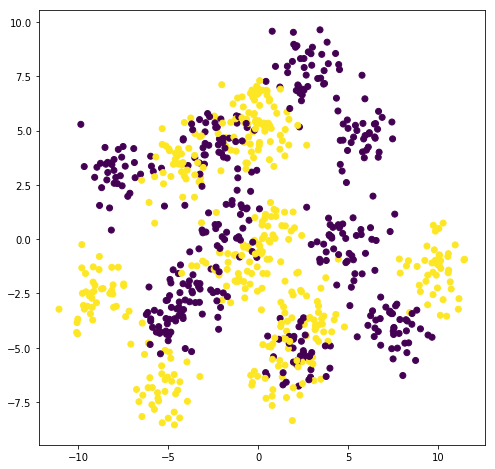

In [37]:
# Compute decomposition
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
tf = PCA(n_components=2)
Xt_train = tf.fit_transform(X_train)

# Plot
plt.scatter(Xt_train[:, 0], Xt_train[:, 1], c=y_train)
plt.show()

# See also: KernelPCA, NMF, FastICA, Kernel approximations, 
#           manifold learning, etc